### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

> Independent variable: Congruent or incongruent words condition.

> Dependant variable: The time it takes to complete the tests.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

> **$H_{0}$**: **$p_{incogruent}$ = $p_{congruent}$** (Null hyphotheses)

> **$H_{1}$**: **$p_{incogruent}$ ≠ $p_{congruent}$** (Alternative hyphotheses)


> Null hyphothesis: People tend to spend the same amount of time for the congruent and incongruent conditions of Stroop Effect tests.

> Alternative hyphothesis: It takes different amount of time for the people to solve the congruent and incongruent conditions of Stroop Effect tests.

In [2]:
# Perform the analysis here
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv("stroopdata.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


> As the sample size is below 30 and we do not know about the population standard deviation, it is better to choose t-test over z-test. Moreover, we apply t-test to see whether the differences of these two proportions are zero or not. As the variable we will be examining is a dependant one (the time it takes to complete the test depending on the test being congruent or incongruent, i.e. when there is only one sample that has been tested twice), we need to conduct a paired t-test (i.e. dependant t-test). We will use samples from the data to conduct the t-test.

> As will be seen in Question-3, the means of the time took for both tests are quite different. Hence I expect the t-score would be a huge number (more than 5), which means there is a significant difference between these groups. Furthermore, I expect a p-value smaller than the Type I Error threshold, so that we can reject the null hypothesis.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [3]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
print("Congrugent condition mean time: " + str(df.Congruent.mean()))
print("Congrugent condition std dev: " + str(df.Congruent.std(ddof=1)))
print("------------------")
print("Incongrugent condition mean time: " + str(df.Incongruent.mean()))
print("Incongrugent condition std dev: " + str(df.Incongruent.std(ddof=1)))
print("------------------")
print("Observed difference mean time: " + str(df.Congruent.mean()-df.Incongruent.mean()))

Congrugent condition mean time: 14.051125000000004
Congrugent condition std dev: 3.559357957645195
------------------
Incongrugent condition mean time: 22.01591666666667
Incongrugent condition std dev: 4.797057122469138
------------------
Observed difference mean time: -7.964791666666665


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

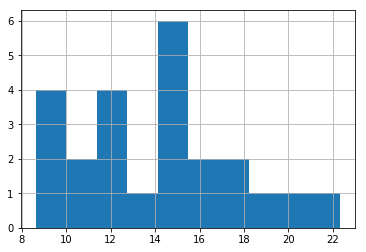

In [5]:
df.Congruent.hist();

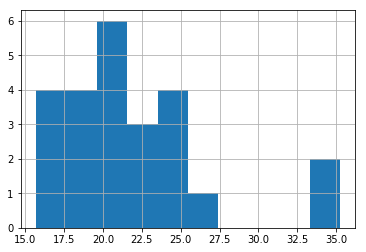

In [6]:
df.Incongruent.hist();

> Comparing the histograms for the average time of the test for the congruent and incongruent data, it's easy to observe that time took to complete the congruent tests are mostly less when compared to that of incongruent tests.

>> We cant really say that the distribution for the congruent test results is normal, but maybe right skewed. 

>> Except some outliers, the distribution for the incongruent tests seems normal.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [7]:
# Applying t-test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [8]:
import scipy.stats as stats

cong = df.Congruent.values.tolist()
incong = df.Incongruent.values.tolist()

# Perform ttest
result = stats.ttest_rel(cong,incong)

print("t-statistics: {0:.5f}".format(result.statistic))
print("p-value: {0:.15f}".format(result.pvalue))

t-statistics: -8.02071
p-value: 0.000000041030006


> As the data we have is dependant (there is only one sample that has been tested twice), I have chosen a two-related (paired) t-test (ttest_rel of scipy).

> We have found a t-score of 8.02071, which is very high and enough to thell that these two groups are different.

> When compared to a 5% Type I error threshold, our p-value (0.000000041) is a lot less than this value, which helps us to reject the null hyphothesis and accept the alternative hyphothesis.

> These results indicate that our data is statistically significant.

> As my own Stroop test also resulted congruent condition time is being less than the incongruent time, I was expecting these results. 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--

<h2> Reference Links </h2>

* http://www.statisticshowto.com/probability-and-statistics/t-test/

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

* https://en.wikipedia.org/wiki/Student%27s_t-test

* http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/